In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam
import pandas as pd
import pydotplus
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.utils.vis_utils import plot_model # This line is causing the error
from tensorflow.keras.utils import plot_model # Import plot_model from tensorflow.keras.utils instead
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam
import pandas as pd
import pydotplus
from tensorflow import keras
#from keras.utils.vis_utils import plot_model # This line is also causing the error, remove it
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Image_size = [224,224]
valid_path = "/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Test"
train_path = "C/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train"

In [ ]:
resnet = ResNet50(include_top=False , input_shape=Image_size+[3],weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
!pip install pydot

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.873857 to fit



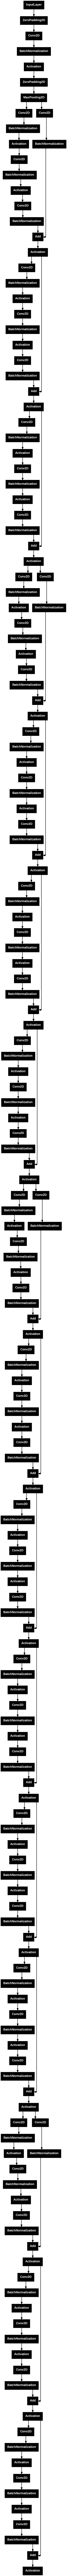

In [ ]:
plot_model(resnet)

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
folders = glob("/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/*")
folders

['/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/mercedes',
 '/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/lamborghini',
 '/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train/audi']

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.863494 to fit



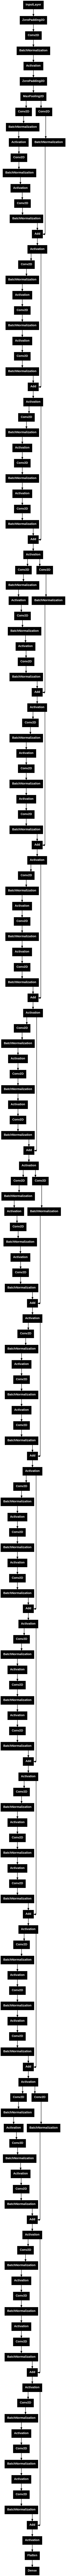

In [ ]:
model = Model(inputs = resnet.input , outputs = prediction)

plot_model(model)

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Train",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory("/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Test",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 58 images belonging to 3 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 62s 49s/step - accuracy: 0.3750 - loss: 3.6686 - val_accuracy: 0.1552 - val_loss: 21.3802
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 954ms/step - accuracy: 0.3438 - loss: 13.5903 - val_accuracy: 0.1552 - val_loss: 12.4691
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 971ms/step - accuracy: 0.4479 - loss: 8.0260 - val_accuracy: 0.3276 - val_loss: 8.9995
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 936ms/step - accuracy: 0.3854 - loss: 6.9191 - val_accuracy: 0.5172 - val_loss: 5.4390
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 953ms/step - accuracy: 0.3229 - loss: 8.1396 - val_accuracy: 0.5172 - val_loss: 6.5192
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3229 - loss: 7.2953 - val_accuracy: 0.1552 - val_loss: 2.4550
Epoch 12/50
2

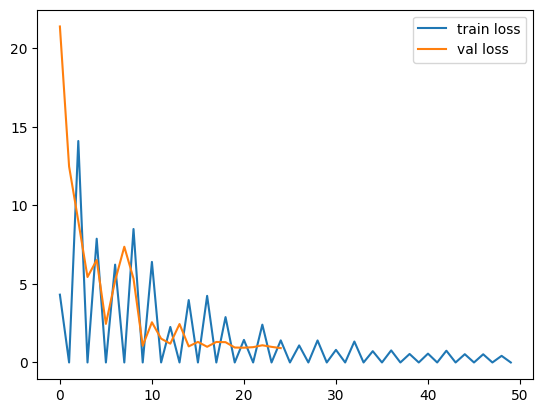

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

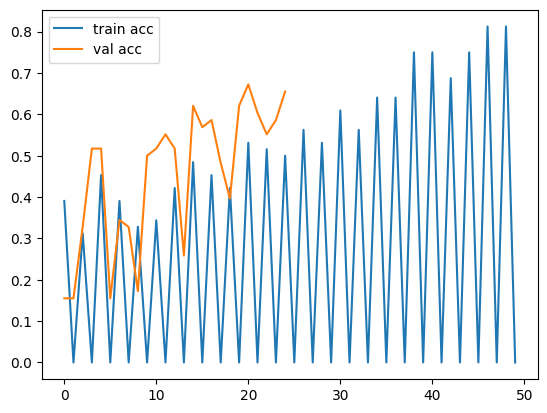

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step


array([[8.04598927e-02, 5.74842155e-01, 3.44697952e-01],
       [3.83982807e-01, 4.96452659e-01, 1.19564511e-01],
       [9.76756588e-03, 9.54160154e-01, 3.60722505e-02],
       [3.43398948e-04, 9.97808516e-01, 1.84808765e-03],
       [1.26278445e-01, 5.50264359e-01, 3.23457211e-01],
       [1.71892606e-02, 7.63103127e-01, 2.19707698e-01],
       [3.84251624e-02, 8.87277603e-01, 7.42972195e-02],
       [1.19004585e-01, 6.97445154e-01, 1.83550298e-01],
       [4.07910626e-03, 5.57014942e-01, 4.38905925e-01],
       [5.60117923e-02, 2.26496607e-01, 7.17491627e-01],
       [7.67514944e-01, 1.25726601e-02, 2.19912425e-01],
       [8.69698822e-03, 9.09862459e-01, 8.14405084e-02],
       [2.34430619e-02, 8.99587452e-01, 7.69695342e-02],
       [3.51110771e-02, 9.01540995e-01, 6.33479357e-02],
       [1.66233499e-02, 6.20189011e-01, 3.63187611e-01],
       [2.29421467e-01, 1.55340061e-01, 6.15238488e-01],
       [1.15765475e-01, 6.68119490e-01, 2.16114998e-01],
       [6.00066818e-02, 8.05319

In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/car/car+brand+dataset/dataset/Images/Test/lamborghini/14.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

x =x /255

In [ ]:
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
from keras.applications.inception_v3 import preprocess_input

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==1:
  preds="The Car IS Audi"
elif preds==2:
  preds="The Car is Lamborghini"
else:
  preds="The Car Is Mercedes"
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Car IS Audi


In [ ]:
preds

'The Car IS Audi'